# DimRedTools Overview

In [ ]:
!pip install dimredtools

In [3]:
import numpy as np
import dimredtools
import matplotlib.pyplot as plt
from sklearn.datasets import make_swiss_roll

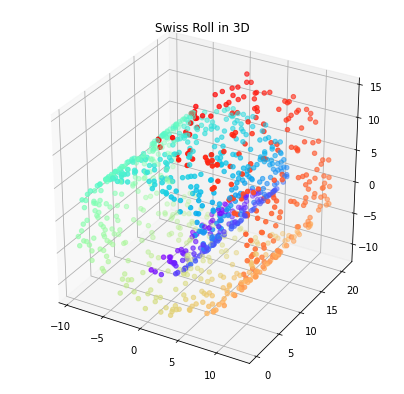

In [4]:
def show_swiss_roll(X, color, title="Swiss Roll in 3D"):
    fig = plt.figure(figsize=(7, 7))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.rainbow)
    plt.title(title)
    plt.show()

def test_model(result, color, title=""):
    plt.figure(figsize=(6, 6))
    plt.grid(linestyle="dotted")
    plt.scatter(result[:, 0], result[:, 1], c=color, cmap=plt.cm.rainbow)
    plt.title(title)
    plt.show()

X, color = make_swiss_roll(n_samples=1000, random_state=123)
show_swiss_roll(X, color)

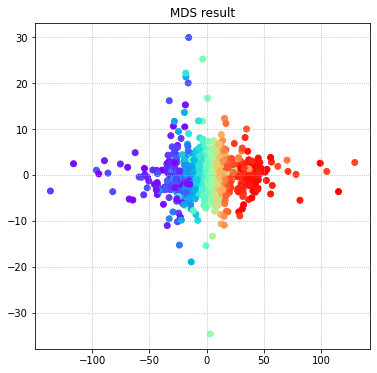

In [44]:
np.random.seed(12)
init = (np.linspace([-15, 0], [15, 0], num=1000) + np.vstack((np.zeros(1000), np.random.randn(1000) * 2)).T)[np.argsort(np.argsort(color))]
test_model(dimredtools.MDS().fit_transform(X, init), color, "MDS result")

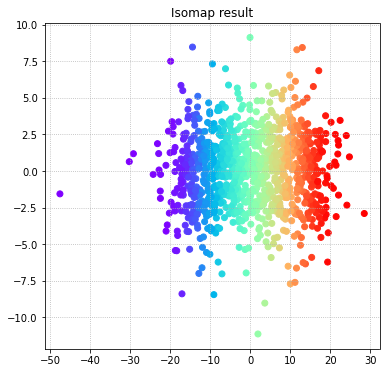

In [45]:
isomap = dimredtools.Isomap()
isomap.fit_transform(X)
test_model(dimredtools.MDS(learning_rate=1.5e-3).fit_transform(isomap.dist_matrix_, init), color, "Isomap result")

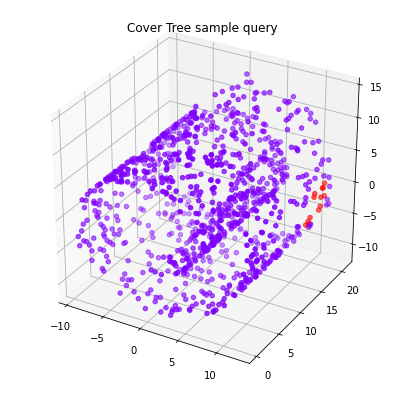

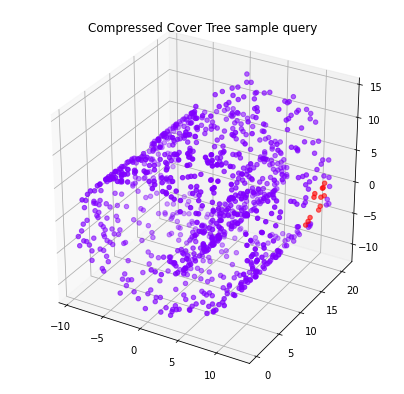

In [5]:
for tree, name in [(dimredtools.CoverTree(X), "Cover Tree sample query"), (dimredtools.CompressedCoverTree(X), "Compressed Cover Tree sample query")]:
    distances, indices = tree.query(np.array([10, 16, 0]), k=12)
    color1 = np.zeros_like(color)
    color1[indices] = 10
    show_swiss_roll(X, color1, name)

In [ ]:
import time
np.random.seed(12)
models = [dimredtools.CoverTree(X), dimredtools.CompressedCoverTree(X), dimredtools.Bruteforce(X)]
names = ["Cover Tree", "Compressed Cover Tree", "Bruteforce"]
results = [0] * 3
for i in range(3):
    start_time = time.perf_counter()
    for query in range(1000):
        distances, indices = models[i].query(np.random.uniform(-10, 20, 3), k=10)
    results[i] = time.perf_counter() - start_time

plt.bar(names, results)
plt.title("Performance benchmark, 1000 queries of 10 nearest neighbors among 1000 objects")
plt.ylabel("time in seconds");